In [145]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from geopandas import plotting
##from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual,interactive_output, VBox, HBox 

In [146]:
os.getcwd()

'/home/jupyterlab/voila_current/notebooks/Get'

In [147]:
path2file = '/home/jupyterlab/data/LSOAs_latest.csv'

In [148]:
lsoa_latest_df = pd.read_csv(path2file)

In [149]:
lsoa_latest_df

,lsoa11_cd,lsoa11_nm,wk_05,wk_06,wk_07,wk_08,wk_09,wk_10,wk_11,wk_12,...,wk_30,wk_31,wk_32,wk_33,wk_34,wk_35,wk_36,wk_37,wk_38,wk_39
0,E01000029,Barking and Dagenham 001C,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,E01000037,Barking and Dagenham 003B,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,E01000046,Barking and Dagenham 017D,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,3,-99
3,E01000064,Barking and Dagenham 006E,-99,-99,-99,-99,-99,-99,5,-99,...,-99,-99,-99,-99,-99,-99,4,-99,-99,3
4,E01000068,Barking and Dagenham 016E,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,4,-99,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32840,E01033600,Westminster 007F,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
32841,E01033610,Thurrock 019B,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
32842,E01033666,Manchester 017F,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,4,-99,8,6
32843,E01033729,Greenwich 030E,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


In [150]:
all_columns_list = list(lsoa_latest_df.columns)

In [151]:
id_vars_list = ['lsoa11_cd','lsoa11_nm']
for x in id_vars_list:
    all_columns_list.remove(x)

In [152]:
all_columns_list

['wk_05',
 'wk_06',
 'wk_07',
 'wk_08',
 'wk_09',
 'wk_10',
 'wk_11',
 'wk_12',
 'wk_13',
 'wk_14',
 'wk_15',
 'wk_16',
 'wk_17',
 'wk_18',
 'wk_19',
 'wk_20',
 'wk_21',
 'wk_22',
 'wk_23',
 'wk_24',
 'wk_25',
 'wk_26',
 'wk_27',
 'wk_28',
 'wk_29',
 'wk_30',
 'wk_31',
 'wk_32',
 'wk_33',
 'wk_34',
 'wk_35',
 'wk_36',
 'wk_37',
 'wk_38',
 'wk_39']

In [153]:
lsoa_data = pd.melt(lsoa_latest_df, id_vars=id_vars_list, value_vars=all_columns_list)

In [154]:
lsoa_data

,lsoa11_cd,lsoa11_nm,variable,value
0,E01000029,Barking and Dagenham 001C,wk_05,-99
1,E01000037,Barking and Dagenham 003B,wk_05,-99
2,E01000046,Barking and Dagenham 017D,wk_05,-99
3,E01000064,Barking and Dagenham 006E,wk_05,-99
4,E01000068,Barking and Dagenham 016E,wk_05,-99
...,...,...,...,...
1149570,E01033600,Westminster 007F,wk_39,-99
1149571,E01033610,Thurrock 019B,wk_39,-99
1149572,E01033666,Manchester 017F,wk_39,6
1149573,E01033729,Greenwich 030E,wk_39,-99


In [155]:
lsoa_trend_data = lsoa_data.replace(-99,0)
lsoa_trend_data['weekasnumber'] = lsoa_trend_data['variable'].str[3:5].astype(int)

In [156]:
lsoa_southwark = lsoa_trend_data[lsoa_trend_data.lsoa11_nm.str.contains('Southwark')]
lsoa_lookup_southwark_wk5 = lsoa_southwark[lsoa_southwark['weekasnumber']==15]
lsoa_lookup_southwark_wk5.head(5)

,lsoa11_cd,lsoa11_nm,variable,value,weekasnumber
328762,E01003938,Southwark 006A,wk_15,0,15
328763,E01003951,Southwark 033E,wk_15,0,15
328764,E01003957,Southwark 032C,wk_15,0,15
328765,E01003964,Southwark 015A,wk_15,0,15
328766,E01003975,Southwark 004A,wk_15,0,15


In [157]:
lsoa_plot = lsoa_southwark.pivot(index='weekasnumber', columns='lsoa11_nm', values='value')
#lsoa_plot.plot()

In [158]:
import datetime
datetime.date(2020, 10, 8).isocalendar()[1]

41

In [159]:
path2file = '/home/jupyterlab/data/Output_Area_to_LSOA_to_MSOA_to_Local_Authority_District__December_2017__Lookup_with_Area_Classifications_in_Great_Britain.csv'

In [160]:
oa_lookup_df = pd.read_csv(path2file)

In [161]:
oa_lookup_df.head(5)

,OA11CD,OAC11CD,OAC11NM,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM,FID
0,E00060343,7d1,Ageing Communities and Families,E01011966,Hartlepool 006B,5b,Aspiring urban households,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,1
1,E00174083,7d1,Ageing Communities and Families,E01011974,Hartlepool 005B,4b,Constrained renters,E02002487,Hartlepool 005,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,2
2,E00060349,6a4,Ageing in Suburbia,E01011965,Hartlepool 006A,8b,Ageing suburbanites,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,3
3,E00060418,6a4,Ageing in Suburbia,E01011983,Hartlepool 006C,8a,Affluent communities,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,4
4,E00060255,8c1,Ageing Industrious Workers,E01011950,Hartlepool 008A,4a,Challenged white communities,E02002490,Hartlepool 008,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,5


In [162]:
localauthority_list = list(oa_lookup_df['LAD17NM'].unique())
localauthority_list.sort()
localauthority_list

['Aberdeen City',
 'Aberdeenshire',
 'Adur',
 'Allerdale',
 'Amber Valley',
 'Angus',
 'Argyll and Bute',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Bexley',
 'Birmingham',
 'Blaby',
 'Blackburn with Darwen',
 'Blackpool',
 'Blaenau Gwent',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bournemouth',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Bridgend',
 'Brighton and Hove',
 'Bristol, City of',
 'Broadland',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Caerphilly',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Cardiff',
 'Carlisle',
 'Carmarthenshire',
 'Castle Point',
 'Central Bedfordshire',
 'Ceredigion',
 'Charnwood',
 'Chelmsford',
 'Cheltenham',
 'Cherwell',
 'Cheshire East',
 'Cheshire West an

In [163]:
region_list = list(oa_lookup_df['RGN11NM'].unique())
region_list.sort()
region_list

['East Midlands',
 'East of England',
 'London',
 'North East',
 'North West',
 'Scotland',
 'South East',
 'South West',
 'Wales',
 'West Midlands',
 'Yorkshire and The Humber']

In [164]:
oa_lookup_df.columns

Index(['OA11CD', 'OAC11CD', 'OAC11NM', 'LSOA11CD', 'LSOA11NM', 'SOAC11CD',
       'SOAC11NM', 'MSOA11CD', 'MSOA11NM', 'LAD17CD', 'LAD17NM', 'LACCD',
       'LACNM', 'RGN11CD', 'RGN11NM', 'CTRY11CD', 'CTRY11NM', 'FID'],
      dtype='object')

In [165]:
lsoa_lookup_columns = oa_lookup_df[['LSOA11CD', 'LSOA11NM',
        'MSOA11CD', 'MSOA11NM', 'LAD17CD', 'LAD17NM', 'LACCD',
       'LACNM', 'RGN11CD', 'RGN11NM', 'CTRY11CD', 'CTRY11NM']]

In [166]:
lsoa_lookup_columns.shape

(227759, 12)

In [167]:
lsoa_lookup_df = lsoa_lookup_columns.drop_duplicates()

In [168]:
lsoa_lookup_df.shape

(41729, 12)

In [169]:
lsoa_lookup_df.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM
0,E01011966,Hartlepool 006B,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
1,E01011974,Hartlepool 005B,E02002487,Hartlepool 005,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
2,E01011965,Hartlepool 006A,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
3,E01011983,Hartlepool 006C,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
4,E01011950,Hartlepool 008A,E02002490,Hartlepool 008,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England


In [170]:
fp = '/home/jupyterlab/data/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_EW_BFC_v3.shp'

In [171]:
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,City of London 001A,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18..."
1,2,E01000002,City of London 001B,City of London 001B,228419.333099,2708.052040,"POLYGON ((532267.728 181643.781, 532262.875 18..."
2,3,E01000003,City of London 001C,City of London 001C,59054.013168,1224.770897,"POLYGON ((532105.312 182010.574, 532104.872 18..."
3,4,E01000005,City of London 001E,City of London 001E,189577.165154,2275.832056,"POLYGON ((533610.974 181410.968, 533615.622 18..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,146536.520470,1966.162225,"POLYGON ((544817.826 184346.261, 544815.791 18..."


In [172]:
##data2plot1_df = lsoa_lookup_southwark_wk5.merge(lsoa_lookup_df, left_on='lsoa11_cd', right_on='LSOA11CD')
data2plot1_df = lsoa_trend_data.merge(lsoa_lookup_df, left_on='lsoa11_cd', right_on='LSOA11CD')


In [173]:
data2plot2_df = map_df.merge(data2plot1_df,right_on='lsoa11_cd', left_on='LSOA11CD')

In [192]:

#['lsoa11_cd', 'lsoa11_nm', 'variable', 'value', 'weekasnumber','Shape__Are', 'Shape__Len', 'geometry']
data2plot_df = data2plot2_df[['lsoa11_cd', 'lsoa11_nm','LAD17NM','RGN11NM','Shape__Are', 'Shape__Len', 'geometry','weekasnumber','value']].copy()
data2plot_df['OBJECTID'] = data2plot_df.index
data2plot_df['cumulative_value'] = data2plot_df.groupby(['lsoa11_nm','weekasnumber'])['value'].apply(lambda x: x.cumsum())
data2plot_df.head(5)

,lsoa11_cd,lsoa11_nm,LAD17NM,RGN11NM,Shape__Are,Shape__Len,geometry,weekasnumber,value,OBJECTID,cumulative_value
0,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",5,0,0,0
1,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",6,0,1,0
2,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",7,0,2,0
3,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",8,0,3,0
4,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",9,0,4,0


In [198]:
def filterframe(WeekIn,RegionIn):
    #region_in = 'London'
    lsoa_region = data2plot_df[data2plot_df['RGN11NM'] == RegionIn]
    lsoa_region_week = lsoa_region[lsoa_region['weekasnumber']==WeekIn]
    return lsoa_region_week
#sw_df = filterframe(5,'London')
#sw_df


In [199]:
#interact(filterframe, WeekIn=widgets.IntSlider(min=5, max=40, step=1, value=25));

In [200]:
#gdf = GeoDataFrame(data2plot_df)

#data2plot_df.plot(column='value')


In [201]:
def f(x):
    return x

In [202]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [203]:
def plotthegraph(WeekIn,RegionIn):
    data2plot = filterframe(WeekIn,RegionIn)
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.set_title(WeekIn)

    data2plot.plot(column='cumulative_value', ax=ax, legend=True)
#plotthegraph(5,'London')

In [204]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [205]:
#weekinwidget = widgets.IntSlider(min=5, max=40, step=1, value=25,description='WeekIn')


regionwidget = widgets.SelectMultiple(
    options=region_list,
    value=['London'],
    #rows=10,
    description='RegionIn',
    disabled=False
)

playwidget = widgets.Play(
    value=25,
    min=0,
    max=35,
    step=1,
    interval=100,
    description="Press play",
    disabled=False
)

#widgets.jslink((play, 'value'), (slider, 'value'))
#widgets.HBox([play, slider])

In [206]:
previousdf = []

In [207]:


def plotthegraph1(WeekIn,RegionIn):
    #data2plot = filterframe1(WeekIn,Region)
    lsoa_region = data2plot_df[data2plot_df['RGN11NM'].isin(RegionIn)]
    lsoa_region_week = lsoa_region[lsoa_region['weekasnumber']==WeekIn]
    #fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    #lsoa_region_week.plot(column='value', ax=ax, legend=True)
    #lsoa_region_week.plot(df=lsoa_region_week,column='value', ax=ax, legend=True)
    #custom_plot(lsoa_region_week)
    
    #if lsoa_region_week.empty:
    #    plotting.plot_dataframe(previousdf,column='value',
    #                        legend=True,figsize=(10,10), vmin=0, vmax=30,aspect='equal')
    #else:
    
    plotting.plot_dataframe(lsoa_region_week,column='cumulative_value',
                            legend=True,figsize=(10,10), vmin=0, vmax=20,aspect='equal')
    #previousdf = lsoa_region_week

def f(WeekIn,RegionIn):
    print((WeekIn,RegionIn))
    #plotthegraph(5,'London')

w = interactive_output(plotthegraph1,{"WeekIn":playwidget,"RegionIn":regionwidget})

hbox1 = HBox([playwidget,regionwidget])
#hbox2 = HBox([measurewidget,indexwidget, activitywidget])
vbox =  VBox([hbox1])

display(w,vbox)

#out = widgets.interactive_output(f, {"WeekIn":weekinwidget,"RegionIn":regionwidget})

#display(ui, out)

Output()

In [185]:
#np.linspace(1, 40, 40).tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0]

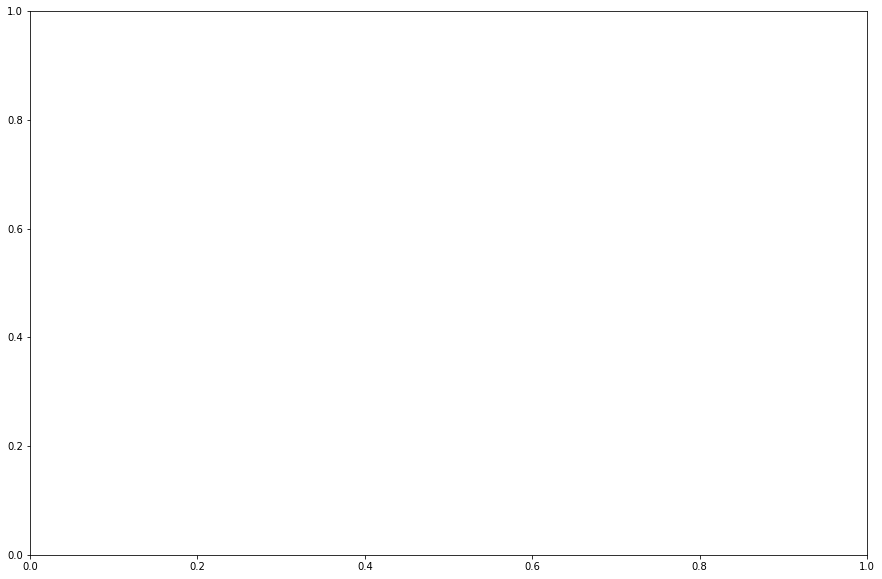

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

def init():
    data2plot = filterframe(5,'London')
    #plt.plot(data2plot,ax=ax, legend=True)
    #ax = custom_plot(data2plot)
    ax_r = plotting.plot_dataframe(lsoa_region_week,ax=ax)
    return ax_r

def update(frame):
    data2plot = filterframe(Frame,'London')
    #ax = custom_plot(data2plot)
    ax_r = plotting.plot_dataframe(lsoa_region_week,ax=ax)
    return ax_r

ani = FuncAnimation(fig, update, frames=np.linspace(1, 40, 40),
                    init_func=init)
plt.show()